## Exploring Storm Twitter Data

Aim: To explore, characterize, and interpret the temporal distribution of the tweets. 

In [21]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

#os.chdir('/PySources/inm433/03')
df = pd.read_csv('storm_tweets.csv')
#df.head()
df

,id,Name,X,Y,LONGITUDE,LATITUDE,MESSAGEDATE,USERSCREENNAME,MESSAGETEXT,LOCATION,HASHTAGS,MESSAGETEXT+HASHTAGS,Features,keyword=storm,keyword=wind,keyword=rain,keyword=snow,keyword=hail,keyword=flood,keyword=road,keyword=collapse,keyword=ingury,keyword=disrupt,keyword=forecast,Mask,bad weather (sum),consequence (sum),bad weather,consequence
0,581338551868063744,storm,0.071042,52.094433,0.071042,52.094433,27/03/2015 06:14:46,Willis12Pat,Love retirement! My day.. The 7's taping the ...,Fowlmere; England,NaN,Love retirement! My day.. The 7's taping the ...,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0
1,581275225955893249,collapse,-0.210674,51.478096,-0.210674,51.478096,27/03/2015 02:03:08,Daiz11,Fyi if the brightside remix is played in Londo...,Hammersmith; London,NaN,Fyi if the brightside remix is played in Londo...,collapse,0,0,0,0,0,0,0,1,0,0,0,1000,0.0,1.0,0.0,1.0
2,581312068629954560,wind,-3.086356,53.060090,-3.086356,53.060089,27/03/2015 04:29:32,secondhand_shed,@tonywilliams68 @wrexham strong winds sorry ;i...,Minera; Wales,NaN,@tonywilliams68 @wrexham strong winds sorry ;i...,wind,0,1,0,0,0,0,0,0,0,0,0,1000000000,1.0,0.0,1.0,0.0
3,581274239308832769,flood,-1.118795,52.617813,-1.118795,52.617813,27/03/2015 01:59:12,DrJonMillett,@Leicester_Merc New street lamp is like living...,Leicester; England,NaN,@Leicester_Merc New street lamp is like living...,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0
4,581330592920444928,flood,-0.651385,51.902275,-0.651385,51.902275,27/03/2015 05:43:08,VirtualJukebox,The Flood by Cheryl Cole is #nowplaying in Any...,East; England,nowplaying,The Flood by Cheryl Cole is #nowplaying in Any...,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0
5,581347370438393856,storm,-0.462822,53.219820,-0.462822,53.219818,27/03/2015 06:49:48,CunninghamKian,The calm before the storm ... http://t.co/7Pv5...,Washingborough; England,NaN,The calm before the storm ... http://t.co/7Pv5...,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0
6,581328032511709184,collapse;forecast,-1.537833,53.387165,-1.537833,53.387165,27/03/2015 05:32:58,deffmick,@SkyNews Something fishy here ! Usually; tall...,Yorkshire and The Humber; England,NaN,@SkyNews Something fishy here ! Usually; tall...,collapse;forecast,0,0,0,0,0,0,0,1,0,0,1,1001,0.0,1.0,0.0,1.0
7,581268046955806720,storm,-1.584887,52.778570,-1.584887,52.778568,27/03/2015 01:34:36,_katiegreen__,stormzy / mievado,Swadlincote; England,NaN,stormzy / mievado;,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0
8,581346808099684352,disrupt,0.012129,50.870740,0.012129,50.870739,27/03/2015 06:47:34,philhillslewes,@NRE_Southern @brightonstation what about disr...,Lewes; England,NaN,@NRE_Southern @brightonstation what about disr...,disrupt,0,0,0,0,0,0,0,0,0,1,0,10,0.0,1.0,0.0,1.0
9,581270572723634176,forecast,0.252533,51.511170,0.252533,51.511169,27/03/2015 01:44:38,TheMockneyRebel,Guardian/ICM survey puts Labour in line to gai...,Aveley; England,NaN,Guardian/ICM survey puts Labour in line to gai...,forecast,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0


In [22]:
df['msgdate']=pd.to_datetime(df['MESSAGEDATE'], format="%d/%m/%Y %H:%M:%S")
df.msgdate

0      2015-03-27 06:14:46
1      2015-03-27 02:03:08
2      2015-03-27 04:29:32
3      2015-03-27 01:59:12
4      2015-03-27 05:43:08
5      2015-03-27 06:49:48
6      2015-03-27 05:32:58
7      2015-03-27 01:34:36
8      2015-03-27 06:47:34
9      2015-03-27 01:44:38
10     2015-03-27 06:45:59
11     2015-03-27 06:30:43
12     2015-03-27 06:02:53
13     2015-03-27 06:37:42
14     2015-03-27 06:39:27
15     2015-03-27 04:53:15
16     2015-03-27 00:06:29
17     2015-03-27 00:06:55
18     2015-03-27 00:05:49
19     2015-03-27 11:53:07
20     2015-03-27 11:58:14
21     2015-03-27 12:09:09
22     2015-03-27 11:22:58
23     2015-03-27 11:59:51
24     2015-03-27 12:03:13
25     2015-03-27 12:18:21
26     2015-03-27 11:07:34
27     2015-03-27 11:17:21
28     2015-03-27 11:23:22
29     2015-03-27 11:47:40
               ...        
2590   2015-04-02 10:47:37
2591   2015-04-02 10:45:07
2592   2015-04-02 10:50:27
2593   2015-04-02 11:29:30
2594   2015-04-02 10:46:31
2595   2015-04-02 11:49:01
2

In [23]:
df.msgdate.min()

Timestamp('2015-03-27 00:05:49')

In [24]:
#df.msgdate.min().date()
df['msgdate_h']=(pd.to_datetime(df.msgdate)-pd.to_datetime(df.msgdate.min().date())).astype('int64')/1000000000/3600
#sort ascending by time
df.sort_values(by='msgdate_h')

,id,Name,X,Y,LONGITUDE,LATITUDE,MESSAGEDATE,USERSCREENNAME,MESSAGETEXT,LOCATION,HASHTAGS,MESSAGETEXT+HASHTAGS,Features,keyword=storm,keyword=wind,keyword=rain,keyword=snow,keyword=hail,keyword=flood,keyword=road,keyword=collapse,keyword=ingury,keyword=disrupt,keyword=forecast,Mask,bad weather (sum),consequence (sum),bad weather,consequence,msgdate,msgdate_h
18,581245702476574720,collapse;ingury,-6.481964,53.318516,-6.481964,53.318516,27/03/2015 00:05:49,Watersun555,Dozen Injured In New York Building Collapse ht...,South Dublin; Ireland,NaN,Dozen Injured In New York Building Collapse ht...,collapse;ingury,0,0,0,0,0,0,0,1,1,0,0,1100,0.0,2.0,0.0,1.0,2015-03-27 00:05:49,0.096944
16,581245871326629889,flood,-0.083102,51.540160,-0.083102,51.540161,27/03/2015 00:06:29,KeishaFrancis,FLOOD OUT!!!,Hackney; London,NaN,FLOOD OUT!!!;,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0,2015-03-27 00:06:29,0.108056
17,581245981267722241,ingury,-6.481935,53.318527,-6.481935,53.318527,27/03/2015 00:06:55,Watersun555,30 Injured As Coach Overturns In Scotland http...,South Dublin; Ireland,NaN,30 Injured As Coach Overturns In Scotland http...,ingury,0,0,0,0,0,0,0,0,1,0,0,100,0.0,1.0,0.0,1.0,2015-03-27 00:06:55,0.115278
7,581268046955806720,storm,-1.584887,52.778570,-1.584887,52.778568,27/03/2015 01:34:36,_katiegreen__,stormzy / mievado,Swadlincote; England,NaN,stormzy / mievado;,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0,2015-03-27 01:34:36,1.576667
9,581270572723634176,forecast,0.252533,51.511170,0.252533,51.511169,27/03/2015 01:44:38,TheMockneyRebel,Guardian/ICM survey puts Labour in line to gai...,Aveley; England,NaN,Guardian/ICM survey puts Labour in line to gai...,forecast,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,2015-03-27 01:44:38,1.743889
3,581274239308832769,flood,-1.118795,52.617813,-1.118795,52.617813,27/03/2015 01:59:12,DrJonMillett,@Leicester_Merc New street lamp is like living...,Leicester; England,NaN,@Leicester_Merc New street lamp is like living...,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0,2015-03-27 01:59:12,1.986667
1,581275225955893249,collapse,-0.210674,51.478096,-0.210674,51.478096,27/03/2015 02:03:08,Daiz11,Fyi if the brightside remix is played in Londo...,Hammersmith; London,NaN,Fyi if the brightside remix is played in Londo...,collapse,0,0,0,0,0,0,0,1,0,0,0,1000,0.0,1.0,0.0,1.0,2015-03-27 02:03:08,2.052222
2,581312068629954560,wind,-3.086356,53.060090,-3.086356,53.060089,27/03/2015 04:29:32,secondhand_shed,@tonywilliams68 @wrexham strong winds sorry ;i...,Minera; Wales,NaN,@tonywilliams68 @wrexham strong winds sorry ;i...,wind,0,1,0,0,0,0,0,0,0,0,0,1000000000,1.0,0.0,1.0,0.0,2015-03-27 04:29:32,4.492222
15,581318038395420672,storm,-1.507258,53.405384,-1.507258,53.405384,27/03/2015 04:53:15,Rxcloud93,The calm before the storm,Sheffield; England,NaN,The calm before the storm;,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0,2015-03-27 04:53:15,4.887500
6,581328032511709184,collapse;forecast,-1.537833,53.387165,-1.537833,53.387165,27/03/2015 05:32:58,deffmick,@SkyNews Something fishy here ! Usually; tall...,Yorkshire and The Humber; England,NaN,@SkyNews Something fishy here ! Usually; tall...,collapse;forecast,0,0,0,0,0,0,0,1,0,0,1,1001,0.0,1.0,0.0,1.0,2015-03-27 05:32:58,5.549444


(array([ 3.,  3.,  1.,  0.,  2.,  2.,  9., 11., 12.,  9.,  9., 11., 12.,
         5.,  9.,  4., 10., 14., 11., 16.,  7., 30., 15., 11., 11.,  5.,
         3.,  3.,  0.,  0., 11., 18., 30., 39., 15., 24., 14., 18., 20.,
        14., 12., 15., 19., 30., 19., 14., 15.,  7., 10.,  1.,  4.,  4.,
         3.,  5., 17., 21., 11., 20., 26., 30., 26., 36., 35., 41., 29.,
        31., 16., 19., 19., 25.,  8.,  7., 10.,  4.,  1.,  6.,  3.,  5.,
         5.,  8., 14., 13.,  9., 12.,  6., 11.,  8., 14., 14., 17., 33.,
        28., 49., 40., 50., 72., 32., 31., 25., 19., 20., 34., 48., 43.,
        44., 40., 33., 34., 51., 48., 43., 43., 45., 35., 34., 33., 23.,
        36., 11.,  8.,  3.,  1.,  1.,  5.,  5., 10., 12.,  6., 11., 18.,
        10., 20., 23., 12.,  8., 12., 10., 17., 16., 22., 13., 14.,  6.,
        11.,  3.,  4.,  2.,  2.,  1.,  4.,  6.,  9., 10.,  3., 14., 12.,
        14.,  9.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17

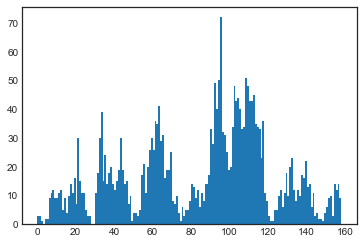

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.hist(df.msgdate_h, bins=range(0,df.msgdate_h.max().round().astype('int64')+1,1))

(array([102., 156., 311., 260., 219., 307., 608., 324., 223., 110.]),
 array([735684.00403935, 735684.66064815, 735685.31725694, 735685.97386574,
        735686.63047454, 735687.28708333, 735687.94369213, 735688.60030093,
        735689.25690972, 735689.91351852, 735690.57012731]),
 <a list of 10 Patch objects>)

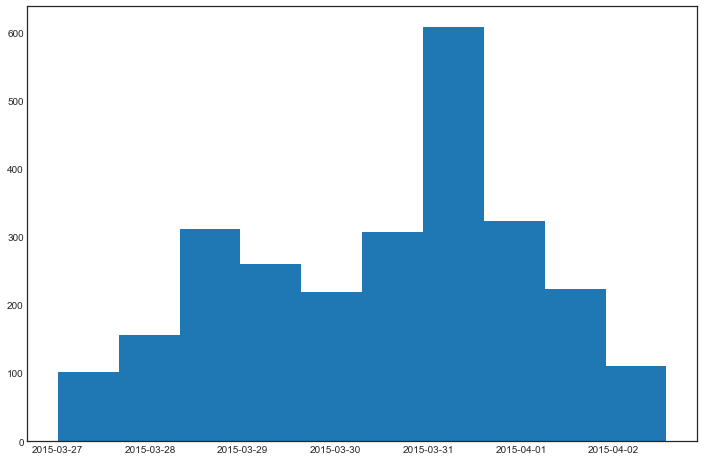

In [38]:
#Exploring the temporal distrubition of tweets
#create a time historgram by day
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.figure(figsize=(12,8))
plt.hist(df.msgdate)

This plot helps us see when the majority of tweets occured, using the more comprehendable date-time expression

C:\Users\TollyC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


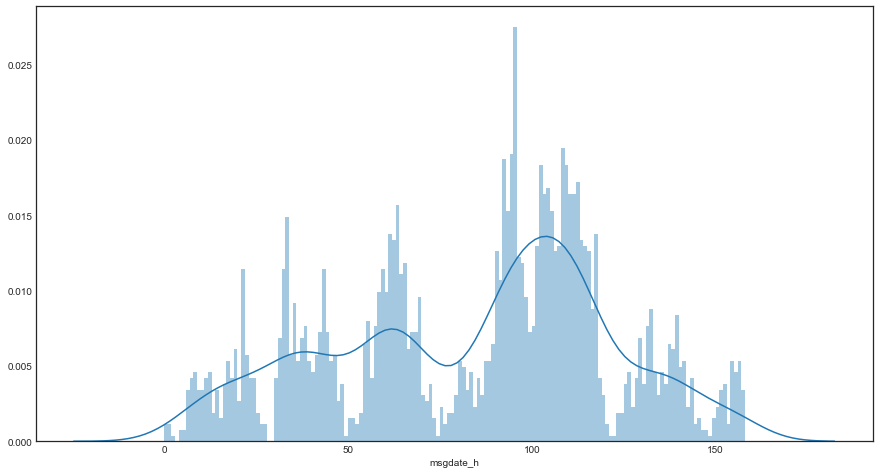

In [40]:
#Using Seaborn to make nicer plots + using KDE (kernal density estimate)
import seaborn as sns
plt.figure(figsize=(15,8))
sns.distplot(df.msgdate_h, bins=range(0,df.msgdate_h.max().round().astype('int64')+1,1));

I'm not sure about this warning message, but the y scale has changed, but hte plot shows the correct shape, if anyone understands this let me know!

## How do tweets develop over time?
I am interested to know if tweets with keywords follow different trends, so I want to plot them on one chart to see the distribution:

In [41]:
#how do tweets develop overtime?

df_fo = df['keyword=forecast'] == 1
df_forecast = df[df_fo]
print(df_forecast)
df_r = df['keyword=rain'] == 1
df_rain = df[df_r]
print(df_rain)
df_c = df['keyword=collapse'] == 1
df_collapse = df[df_c]
print(df_collapse)
df_w = df['keyword=wind'] == 1
df_wind = df[df_w]

                      id                      Name         X          Y  \
6     581328032511709184         collapse;forecast -1.537833  53.387165   
9     581270572723634176                  forecast  0.252533  51.511170   
12    581335562138714112             rain;forecast -1.476630  52.922770   
56    581352972627542016             rain;forecast  0.457820  51.568440   
66    581387349973692416        wind;rain;forecast -2.540189  51.428345   
101   581436130790219776             rain;forecast -1.476630  52.922770   
125   581558122482933760        wind;rain;forecast -3.016154  53.742010   
152   581530401115627520          disrupt;forecast -5.520021  56.400265   
153   581537563246141440             rain;forecast -1.476630  52.922770   
154   581534426137423873             rain;forecast  0.457820  51.568440   
157   581525035417899008             rain;forecast -0.574270  51.235360   
193   581712328779018240  storm;wind;rain;forecast -2.184167  57.338890   
195   581724909094588418 

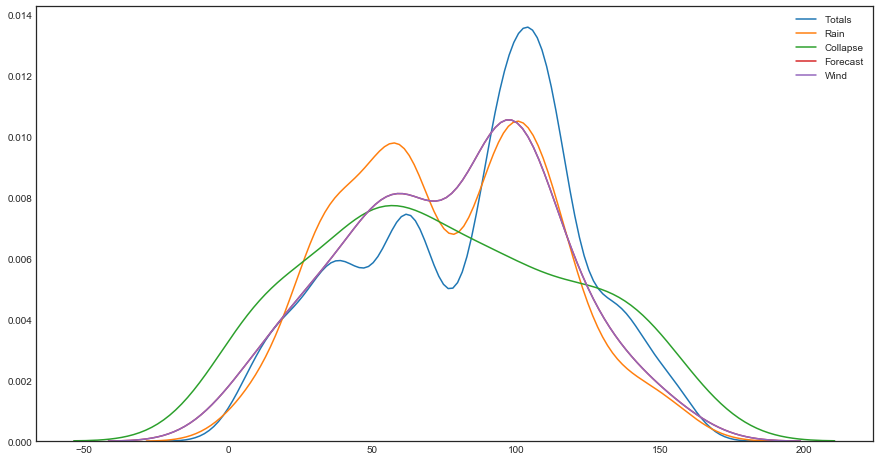

In [43]:
#Plotting different tweet types on same distribution
plt.figure(figsize=(15,8))
sns.kdeplot(df.msgdate_h, label="Totals")
sns.kdeplot(df_rain.msgdate_h, label="Rain")
sns.kdeplot(df_collapse.msgdate_h, label="Collapse")
sns.kdeplot(df_forecast.msgdate_h, label="Forecast")
sns.kdeplot(df_forecast.msgdate_h, label="Wind")
plt.legend();

It appears that across the given timeframe, the tweets do not show a particular trend for key words over time. The key name tweet which seems to not follow the trend is "collapse", which doesn't show a peak at msgdate_h = 100, like the other tweet types.

Perhaps if the data was a wider sample, and included tweets before the storm we might see trends develop over time.

In [44]:
#adapted from
#https://stackoverflow.com/questions/42756934/how-to-plot-lat-and-long-from-pandas-dataframe-on-folium-map-group-by-some-label
import folium
import os
import pandas as pd
import numpy as np

In [45]:
#os.chdir('/PySources/inm433/03')
df = pd.read_csv('storm_tweets.csv')
pd.set_option('display.max_columns', None)
df
#df.head()
#df.tail()

,id,Name,X,Y,LONGITUDE,LATITUDE,MESSAGEDATE,USERSCREENNAME,MESSAGETEXT,LOCATION,HASHTAGS,MESSAGETEXT+HASHTAGS,Features,keyword=storm,keyword=wind,keyword=rain,keyword=snow,keyword=hail,keyword=flood,keyword=road,keyword=collapse,keyword=ingury,keyword=disrupt,keyword=forecast,Mask,bad weather (sum),consequence (sum),bad weather,consequence
0,581338551868063744,storm,0.071042,52.094433,0.071042,52.094433,27/03/2015 06:14:46,Willis12Pat,Love retirement! My day.. The 7's taping the ...,Fowlmere; England,NaN,Love retirement! My day.. The 7's taping the ...,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0
1,581275225955893249,collapse,-0.210674,51.478096,-0.210674,51.478096,27/03/2015 02:03:08,Daiz11,Fyi if the brightside remix is played in Londo...,Hammersmith; London,NaN,Fyi if the brightside remix is played in Londo...,collapse,0,0,0,0,0,0,0,1,0,0,0,1000,0.0,1.0,0.0,1.0
2,581312068629954560,wind,-3.086356,53.060090,-3.086356,53.060089,27/03/2015 04:29:32,secondhand_shed,@tonywilliams68 @wrexham strong winds sorry ;i...,Minera; Wales,NaN,@tonywilliams68 @wrexham strong winds sorry ;i...,wind,0,1,0,0,0,0,0,0,0,0,0,1000000000,1.0,0.0,1.0,0.0
3,581274239308832769,flood,-1.118795,52.617813,-1.118795,52.617813,27/03/2015 01:59:12,DrJonMillett,@Leicester_Merc New street lamp is like living...,Leicester; England,NaN,@Leicester_Merc New street lamp is like living...,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0
4,581330592920444928,flood,-0.651385,51.902275,-0.651385,51.902275,27/03/2015 05:43:08,VirtualJukebox,The Flood by Cheryl Cole is #nowplaying in Any...,East; England,nowplaying,The Flood by Cheryl Cole is #nowplaying in Any...,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0
5,581347370438393856,storm,-0.462822,53.219820,-0.462822,53.219818,27/03/2015 06:49:48,CunninghamKian,The calm before the storm ... http://t.co/7Pv5...,Washingborough; England,NaN,The calm before the storm ... http://t.co/7Pv5...,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0
6,581328032511709184,collapse;forecast,-1.537833,53.387165,-1.537833,53.387165,27/03/2015 05:32:58,deffmick,@SkyNews Something fishy here ! Usually; tall...,Yorkshire and The Humber; England,NaN,@SkyNews Something fishy here ! Usually; tall...,collapse;forecast,0,0,0,0,0,0,0,1,0,0,1,1001,0.0,1.0,0.0,1.0
7,581268046955806720,storm,-1.584887,52.778570,-1.584887,52.778568,27/03/2015 01:34:36,_katiegreen__,stormzy / mievado,Swadlincote; England,NaN,stormzy / mievado;,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0
8,581346808099684352,disrupt,0.012129,50.870740,0.012129,50.870739,27/03/2015 06:47:34,philhillslewes,@NRE_Southern @brightonstation what about disr...,Lewes; England,NaN,@NRE_Southern @brightonstation what about disr...,disrupt,0,0,0,0,0,0,0,0,0,1,0,10,0.0,1.0,0.0,1.0
9,581270572723634176,forecast,0.252533,51.511170,0.252533,51.511169,27/03/2015 01:44:38,TheMockneyRebel,Guardian/ICM survey puts Labour in line to gai...,Aveley; England,NaN,Guardian/ICM survey puts Labour in line to gai...,forecast,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0


In [46]:
xmm=(df.X.min()+df.X.max())/2
ymm=(df.Y.min()+df.Y.max())/2
map = folium.Map(location=[ymm,xmm], zoom_start=5)
df.apply(lambda row:folium.CircleMarker(location=[row["Y"], row["X"]], 
                                              radius=3) #fill_color=colors[row['Class']])
                                             .add_to(map), axis=1)
map

## We want to investigate distribution, so a heatmap could work!

In [47]:
from folium.plugins import HeatMap

In [48]:
xmm=(df.X.min()+df.X.max())/2
ymm=(df.Y.min()+df.Y.max())/2

hmap = folium.Map(location=[ymm,xmm], zoom_start=5)

hm_wide = HeatMap(list(zip(df.LATITUDE.values, df.LONGITUDE.values)), 
                   min_opacity=0.2,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

hmap.add_child(hm_wide)

So this isn't very helpful...

Let's try altering the heatmap values:

In [49]:
xmm=(df.X.min()+df.X.max())/2
ymm=(df.Y.min()+df.Y.max())/2

hmap = folium.Map(location=[ymm,xmm], zoom_start=6)

hm_wide = HeatMap(list(zip(df.LATITUDE.values, df.LONGITUDE.values)), 
                   min_opacity=0.2,
                   radius=5, blur=10, #Adjusting the radius will make areas more distict, and reducing blur will make map clearer!
                   max_zoom=1, 
                 )

hmap.add_child(hm_wide)

Fairly unsurprisingly, the majority of tweets are centred around the big cities (London, Manchester, Norwich, Dublin, Edinburgh & Newcastle).

It's quite difficult to distiguish the intensity between areas where there are a high number of tweets, altering the colours could help...

In [51]:
xmm=(df.X.min()+df.X.max())/2
ymm=(df.Y.min()+df.Y.max())/2

hmap = folium.Map(location=[ymm,xmm], zoom_start=7)

hm_wide = HeatMap(list(zip(df.LATITUDE.values, df.LONGITUDE.values)), 
                   min_opacity=0.2,
                   radius=7, blur=10, 
                   max_zoom=1, gradient={.6: 'blue', .9: 'orange', 1: 'red'}) 
                 

hmap.add_child(hm_wide)

Not much better, so we can use a Marker Cluster which will aggregate the tweets for an area, dependent on the zoom - this can help distinguish between dense areas.

In [54]:
from folium.plugins import MarkerCluster
map2 = folium.Map(location=[ymm,xmm], zoom_start=6)
marker_cluster = folium.plugins.MarkerCluster().add_to(map2)
df.apply(lambda row:folium.Marker(location=[row["Y"], row["X"]])
                                             .add_to(marker_cluster), axis=1)
map2

## Click on the circles to zoom in and interact!